# System Update function: Move Agents algorithm

Frame time and time to spent on a task (real time loop function)

In [1]:
#packages
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import re

In [2]:
def descriptive_stats(dataframe, div = 1.0, roundDec = 3, caption = 'Descriptive Statistics', label = 'tab:0'):
    stats = (dataframe.describe(include='all').transpose().filter (['min', '50%','mean', 'max', 'std']).set_axis(['Min.', 'Median', 'Mean', 'Max.', 'Std. Dev.'], axis = 1) / div).round(roundDec)
    latex = re.sub('<([^>]*)>', '\\\\textbf{\g<1>}',
           stats.rename(columns=lambda x: f'<{x}>').to_latex(column_format = '|c||c|c|c|c|c|', bold_rows = True, label = label))
    latex = latex.replace("{}", "\\textbf{Agent Size}")
    latex = latex.replace("\\toprule", "\\hline")
    latex = latex.replace("\\midrule", "\\hline \\hline")
    latex = latex.replace("\\bottomrule", "\\hline")
    latex = latex.replace("\\centering\n\\label{"+label+"}", "\\centering")
    latex = latex.replace("\\end{table}", "\\caption{"+caption+"}\n\\label{"+label+"}\n\\end{table}")
    latex = latex.replace("\\begin{table}", "\\begin{table}[H]")
    print(latex)
    return stats

def processData(filename, xlabel, ylabel, figfile, funcMeans):
    frametime_update_task = pd.read_csv(filename)
    print("SIZE: " + str(frametime_update_task.shape[0]))
    
    descriptive_stats(frametime_update_task)

    boxdata = frametime_update_task.transpose().values.tolist()
    fig, ax = plt.subplots()
    ax.boxplot(boxdata)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(figfile, bbox_inches='tight')
    plt.show()

    d1, d2, d3, d4, d5, d6, d7, d8 = frametime_update_task.transpose().values.tolist()
    levene_result = levene(d1, d2, d3, d4, d5, d6, d7, d8)
    print("levene:\n" + str(levene_result))
    anova_result = funcMeans(d1, d2, d3, d4, d5, d6, d7, d8)
    print("Anova or kruskal:\n" + str(anova_result))
    return frametime_update_task

def mean_std_process(data, ylabelmean, ylabelstd, figfile):
    #Means and Std
    colors = plt.rcParams["axes.prop_cycle"]()
    means = np.mean(data.transpose().values, axis = 1)
    stds = np.std(data.transpose().values, axis = 1)
    agentsize = np.arange(1,9,1)
    plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    axs[0].plot(agentsize, means, color = next(colors)["color"])
    axs[0].set_title('a) Mean')
    axs[0].set_xlabel('Agent Size')
    axs[0].set_ylabel(ylabelmean)
    axs[1].plot(agentsize, stds, color = next(colors)["color"])
    axs[1].set_title('a) Standard Deviation')
    axs[1].set_xlabel('Agent Size')
    axs[1].set_ylabel(ylabelstd)
    plt.savefig(figfile,  bbox_inches='tight')
    plt.show()

SIZE: 2055
\begin{table}[H]
\centering
\begin{tabular}{|c||c|c|c|c|c|}
\hline
\textbf{Agent Size} &  \textbf{Min.} &  \textbf{Median} &  \textbf{Mean} &  \textbf{Max.} &  \textbf{Std. Dev.} \\
\hline \hline
\textbf{agent\_ms\_1} &  20.662 &    29.954 &  29.979 &  42.115 &        2.274 \\
\textbf{agent\_ms\_2} &  21.627 &    30.034 &  29.982 &  39.250 &        2.427 \\
\textbf{agent\_ms\_3} &  18.504 &    29.909 &  29.986 &  40.709 &        2.560 \\
\textbf{agent\_ms\_4} &  18.247 &    29.994 &  29.988 &  42.981 &        2.843 \\
\textbf{agent\_ms\_5} &  10.761 &    30.014 &  29.999 &  69.607 &        3.804 \\
\textbf{agent\_ms\_6} &   9.380 &    30.064 &  29.987 &  48.712 &        4.607 \\
\textbf{agent\_ms\_7} &  16.534 &    29.944 &  29.989 &  43.687 &        3.383 \\
\textbf{agent\_ms\_8} &  12.218 &    29.797 &  29.989 &  51.929 &        4.902 \\
\hline
\end{tabular}
\caption{Descriptive Statistics}
\label{tab:0}
\end{table}



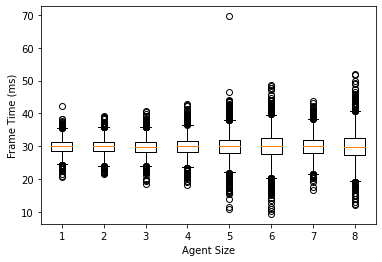

levene:
LeveneResult(statistic=181.90457869872813, pvalue=1.254755554676621e-260)
Anova or kruskal:
KruskalResult(statistic=2.9134924781261886, pvalue=0.8928878538368803)


<Figure size 432x288 with 0 Axes>

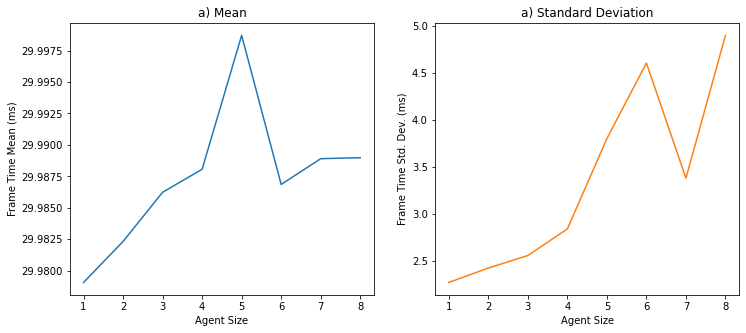

In [3]:
frame_data = processData('./FinalDatasets/system-update-function/update-movement-task-allagents-30ms.csv', 'Agent Size', 'Frame Time (ms)', 'figures/4-system-update-function/frame-movement-boxplot.pdf', kruskal)
mean_std_process(frame_data, 'Frame Time Mean (ms)', 'Frame Time Std. Dev. (ms)', 'figures/4-system-update-function/frame-movement-mean-std.pdf')

SIZE: 2041
\begin{table}[H]
\centering
\begin{tabular}{|c||c|c|c|c|c|}
\hline
\textbf{Agent Size} &  \textbf{Min.} &  \textbf{Median} &  \textbf{Mean} &  \textbf{Max.} &  \textbf{Std. Dev.} \\
\hline \hline
\textbf{agent\_ms\_1} &   0.173 &     0.711 &   0.892 &   6.316 &        0.613 \\
\textbf{agent\_ms\_2} &   0.359 &     1.396 &   1.363 &   7.046 &        0.697 \\
\textbf{agent\_ms\_3} &   0.473 &     1.263 &   1.515 &   7.903 &        0.755 \\
\textbf{agent\_ms\_4} &   0.816 &     2.152 &   2.399 &   8.999 &        0.917 \\
\textbf{agent\_ms\_5} &   0.741 &     2.073 &   2.506 &   9.176 &        1.139 \\
\textbf{agent\_ms\_6} &   1.042 &     2.894 &   3.470 &  13.907 &        1.507 \\
\textbf{agent\_ms\_7} &   0.994 &     3.017 &   3.499 &  10.446 &        1.572 \\
\textbf{agent\_ms\_8} &   1.241 &     2.901 &   3.437 &  12.443 &        1.594 \\
\hline
\end{tabular}
\caption{Descriptive Statistics}
\label{tab:0}
\end{table}



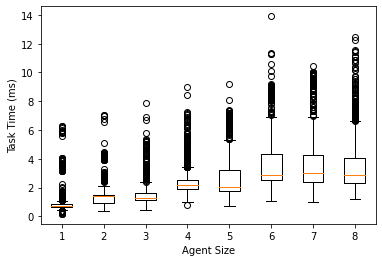

levene:
LeveneResult(statistic=273.9028628278848, pvalue=0.0)
Anova or kruskal:
KruskalResult(statistic=10278.01848349378, pvalue=0.0)


In [4]:
func_data = processData('./FinalDatasets/system-update-function/update-movement-function-allagents.csv', 'Agent Size', 'Task Time (ms)', 'figures/4-system-update-function/task-movement-boxplot.pdf', kruskal)

<Figure size 432x288 with 0 Axes>

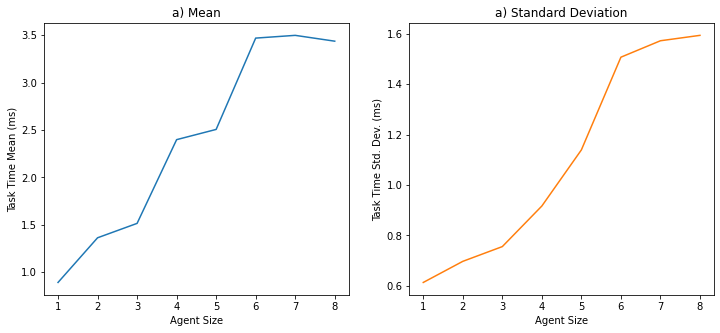

In [5]:
#Means and Std

mean_std_process(func_data, 'Task Time Mean (ms)', 'Task Time Std. Dev. (ms)', 'figures/4-system-update-function/task-movement-mean-std.pdf')